In [1]:
import pandas
import scanpy
import os
import sys
import numpy
import itertools
import numpy
import seaborn
from matplotlib import pyplot
import matplotlib
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
matplotlib.font_manager._rebuild()

In [3]:
mm2inch=25.4

In [4]:
matplotlib.rcParams['font.family'] = 'Arial'

In [5]:
adata = scanpy.read_h5ad('monocle/200315_C1.h5ad')
#adata = scanpy.read_h5ad('monocle/200120_C1.h5ad')

In [6]:
adata.obs['cell_type'].value_counts()

Mesenchymal      571
Perichondrial    139
Chondrocyte       57
Muscle 1          54
Muscle 2          38
Muscle 3          23
Macrophage        10
Neural Crest       8
Epithelial         8
Endothelial        7
EMP                5
Name: cell_type, dtype: int64

In [7]:
clusters = {
    'Muscle 1': adata[:,'Pitx3'][adata.obs['cell_type']=='Muscle 1'].X.toarray(),
    'Muscle 2': adata[:,'Pitx3'][adata.obs['cell_type']=='Muscle 2'].X.toarray(),
    'Muscle 3': adata[:,'Pitx3'][adata.obs['cell_type']=='Muscle 3'].X.toarray(),
}


In [8]:
def plot_gene(adata, gene_name, ax=None,
              fontname='Arial', fontsize=6,
              hidex=False, hidey=False,
    ):
    if ax is None:
        f = pyplot.figure(figsize=(1,3))
        ax = f.add_subplot(1,1,1)

    clusters = [
        (adata[:,gene_name][adata.obs['cell_type']=='Muscle 1'].X.toarray()),
        (adata[:,gene_name][adata.obs['cell_type']=='Muscle 2'].X.toarray()),
        (adata[:,gene_name][adata.obs['cell_type']=='Muscle 3'].X.toarray()),
    ]
    ax.set_title(gene_name, fontname=fontname, fontsize=fontsize)
    boxplot = ax.boxplot(
        clusters,
        labels=['M1', 'M2', 'M3'],
        patch_artist=True,
        #showfliers=False,
        boxprops={'linewidth': .5},
        medianprops={'color': 'black','linewidth':.5},
        capprops={'linewidth':.5},
        whiskerprops={'linewidth':.5},
        flierprops={'markersize': 1.9,
                    'markeredgecolor': 'white',
                    'markeredgewidth': 0,
                    'markerfacecolor': '#c0c0c0'},
        widths=.65,
    )
    colors = ['#00ff00', '#ff8e80', '#ff0000']
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
        
    for l in ax.get_yticklabels():
        l.set_fontname(fontname)
        l.set_fontsize(fontsize-1)
        if hidey:
            l.set_visible(False)
        
    for l in ax.get_xticklabels():
        l.set_fontname(fontname)
        l.set_fontsize(fontsize-1)
        if hidex:
            l.set_visible(False)

    if hidex:
        ax.tick_params(bottom=False)
    #ax.get_yaxis().get_offset_text().set_visible(False)
    return ax

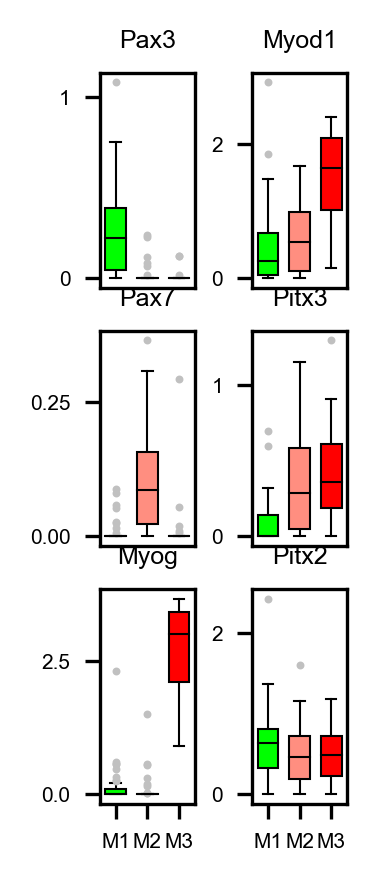

In [9]:
f = pyplot.figure(figsize=(27.024/mm2inch,82/mm2inch), dpi=300)
gs = f.add_gridspec(nrows=3, ncols=2, wspace=.6)
ax = plot_gene(adata, 'Pax3', ax=f.add_subplot(gs[0,0]), hidex=True)
ax = plot_gene(adata, 'Myod1', ax=f.add_subplot(gs[0,1]), hidex=True)
ax = plot_gene(adata, 'Pax7', ax=f.add_subplot(gs[1,0]), hidex=True)
ax = plot_gene(adata, 'Pitx3', ax=f.add_subplot(gs[1,1]), hidex=True)
ax = plot_gene(adata, 'Myog', ax=f.add_subplot(gs[2,0]))
ax = plot_gene(adata, 'Pitx2', ax=f.add_subplot(gs[2,1]))


In [10]:
f.savefig('figure3f-was4b.svg', bbox_inches="tight", pad_inches=0, transparent=True)